<a href="https://colab.research.google.com/github/CleonKalea/Foundation-of-Data-Science/blob/master/Tugas%201/Latihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install forex_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.2 MB/s eta 0:00:00


In [66]:
import pandas as pd
import numpy as np
from forex_python.converter import CurrencyRates, RatesNotAvailableError
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_excel('salaray_survey_2021.xlsx')
df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,NaN,190000,14000.0,USD,NaN,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,NaN,52416,NaN,USD,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,NaN,36000,NaN,USD,NaN,NaN,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


CREATE NEW DATAFRAME

In [4]:
data = {'Industry' : None,
        'Work Experience Overall' : None,
        'Work Experience in the same Field' :  None,
        'Gender' : None,
        'Education' : None,
        'Currency' : None,
        'Total Salary' : None,
        'Total Salary (USD)' : None}

data

latihan_df = pd.DataFrame(data, columns=['Industry', 'Work Experience Overall', 'Work Experience in the same Field', 'Gender', 'Education', 'Currency', 'Total Salary', 'Total Salary (USD)'])
latihan_df

# latihan_df.loc[0, 'Industry'] = "testing"
# latihan_df

# latihan_df.drop(0, inplace=True)
# latihan_df

,Industry,Work Experience Overall,Work Experience in the same Field,Gender,Education,Currency,Total Salary,Total Salary (USD)


RENAME ORIGINAL DATAFRAME COLUMN

In [7]:
df = df.rename(columns={"What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Annual Salary',
                        "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits." : "Monetary Compensation",
                        "What industry do you work in?" : "Industry",
                        "How many years of professional work experience do you have overall?" : "Work Experience Overall",
                        "How many years of professional work experience do you have in your field?" : "Work Experience in the same Field",
                        "What is your gender?" : "Gender",
                        "What is your highest level of education completed?" : "Education",
                        "Please indicate the currency" : "Currency",
                        "If \"Other,\" please indicate the currency here: " : "Other Currency"})

df.iloc[0]

Timestamp                                                                   2021-04-27 11:02:09.743000
How old are you?                                                                                 25-34
Industry                                                                  Education (Higher Education)
Job title                                                           Research and Instruction Librarian
If your job title needs additional context, please clarify here:                                   NaN
Annual Salary                                                                                    55000
Monetary Compensation                                                                              0.0
Currency                                                                                           USD
Other Currency                                                                                     NaN
If your income needs additional context, please provide it here:         

In [8]:
# df.columns
# group_result = df['Industry'].value_counts().reset_index()
# group_result = df['Work Experience Overall'].value_counts().reset_index()
# group_result = df['Work Experience in the same Field'].value_counts().reset_index()
# group_result = df['Gender'].value_counts().reset_index()
# group_result = df['Education'].value_counts().reset_index()
group_result = df['Currency'].value_counts().reset_index()
# group_result = df['Other Currency'].value_counts().reset_index()
print(group_result.to_string())

      index  Currency
0       USD     23288
1       CAD      1665
2       GBP      1585
3       EUR       637
4   AUD/NZD       500
5     Other       156
6       CHF        37
7       SEK        37
8       JPY        23
9       ZAR        14
10      HKD         4


In [12]:
total_rows = df.shape[0]
c = CurrencyRates()
GBP_to_USD = c.get_rate('GBP', 'USD')

for i in range(total_rows):
    industry = df.loc[i, 'Industry']
    work_experience_overall = df.loc[i, 'Work Experience Overall']
    work_experience_in_the_same_field = df.loc[i, 'Work Experience in the same Field']
    annual_salary = df.loc[i, 'Annual Salary']
    monetary_compensation = df.loc[i, 'Monetary Compensation']
    currency = df.loc[i, 'Currency']
    gender = df.loc[i, 'Gender']
    education = df.loc[i, 'Education']

    if np.isnan(monetary_compensation):
        monetary_compensation = 0.0
    else:
        monetary_compensation = monetary_compensation

    total_salary = annual_salary + monetary_compensation

    latihan_df.loc[i, 'Industry'] = industry
    latihan_df.loc[i, 'Work Experience Overall'] = work_experience_overall
    latihan_df.loc[i, 'Work Experience in the same Field'] = work_experience_in_the_same_field
    latihan_df.loc[i, 'Total Salary'] = total_salary
    latihan_df.loc[i, 'Currency'] = currency
    latihan_df.loc[i, 'Gender'] = gender
    latihan_df.loc[i, 'Education'] = education

    print(currency, i)
    try:
        if currency != 'USD':
            converted_total_salary_to_USD = total_salary * c.get_rate(currency, 'USD')
            latihan_df.loc[i, 'Total Salary (USD)'] = converted_total_salary_to_USD
        else:
            latihan_df.loc[i, 'Total Salary (USD)'] = total_salary
    except RatesNotAvailableError:
        print(f"Conversion rate for {currency} to USD is not available. Skipping conversion.")
        continue  # Skip the rest of the loop for the current iteration


# 'Industry', 'Work Experience Overall', 'Work Experience in the same Field', 'Total Salary', 'Currency', 'Gender', 'Education'
# df['Total Salary'] = pd.Series([np.nan] * len(df))
latihan_df

Streaming output truncated to the last 5000 lines.
USD 23082
USD 23083
USD 23084
USD 23085
USD 23086
USD 23087
USD 23088
USD 23089
USD 23090
USD 23091
GBP 23092
USD 23093
USD 23094
USD 23095
USD 23096
GBP 23097
USD 23098
GBP 23099
USD 23100
USD 23101
GBP 23102
GBP 23103
USD 23104
USD 23105
Other 23106
Conversion rate for Other to USD is not available. Skipping conversion.
GBP 23107
USD 23108
USD 23109
GBP 23110
USD 23111
USD 23112
USD 23113
USD 23114
USD 23115
USD 23116
GBP 23117
USD 23118
USD 23119
USD 23120
USD 23121
GBP 23122
Other 23123
Conversion rate for Other to USD is not available. Skipping conversion.
USD 23124
USD 23125
CAD 23126
USD 23127
USD 23128
USD 23129
CAD 23130
USD 23131
USD 23132
USD 23133
USD 23134
GBP 23135
GBP 23136
EUR 23137
USD 23138
USD 23139
USD 23140
USD 23141
USD 23142
USD 23143
USD 23144
USD 23145
CAD 23146
USD 23147
USD 23148
USD 23149
USD 23150
USD 23151
EUR 23152
USD 23153
USD 23154
USD 23155
CAD 23156
USD 23157
USD 23158
USD 23159
USD 23160
USD 23161
U

,Industry,Work Experience Overall,Work Experience in the same Field,Gender,Education,Currency,Total Salary,Total Salary (USD)
0,Education (Higher Education),5-7 years,5-7 years,Woman,Master's degree,USD,55000.0,55000.0
1,Computing or Tech,8 - 10 years,5-7 years,Non-binary,College degree,GBP,58600.0,73711.208457
2,"Accounting, Banking & Finance",2 - 4 years,2 - 4 years,Woman,College degree,USD,34000.0,34000.0
3,Nonprofits,8 - 10 years,5-7 years,Woman,College degree,USD,65000.0,65000.0
4,"Accounting, Banking & Finance",8 - 10 years,5-7 years,Woman,College degree,USD,67000.0,67000.0
...,...,...,...,...,...,...,...,...
27941,Computing or Tech,5-7 years,5-7 years,Man,College degree,USD,204000.0,204000.0
27942,Property or Construction,21 - 30 years,11 - 20 years,NaN,NaN,USD,68000.0,68000.0
27943,Behavioral Health,2 - 4 years,2 - 4 years,Woman,Master's degree,USD,52416.0,52416.0
27944,Computing or Tech,5-7 years,2 - 4 years,Man,College degree,USD,36000.0,36000.0


In [24]:
print(latihan_df.loc[3605])

Industry                             Utilities & Telecommunications
Work Experience Overall                                8 - 10 years
Work Experience in the same Field                    1 year or less
Gender                                                          Man
Education                                              Some college
Currency                                                        USD
Total Salary                                            102000000.0
Total Salary (USD)                                      102000000.0
Name: 3605, dtype: object


In [21]:
# Convert 'Total Salary (USD)' column to numeric values
latihan_df['Total Salary (USD)'] = pd.to_numeric(latihan_df['Total Salary (USD)'], errors='coerce')


In [26]:
# Find the index of the maximum value in the "Total Salary" column
max_index = latihan_df['Total Salary (USD)'].idxmax()

# Get the corresponding value in the "Industry" column using the index
max_industry = latihan_df.loc[max_index, 'Industry']

# Get the maximum value in the "Total Salary" column
max_salary = latihan_df['Total Salary (USD)'].max()

print(max_index)
print("Industry with maximum Total Salary:", max_industry)
print("Maximum Total Salary:", max_salary)

3605
Industry with maximum Total Salary: Utilities & Telecommunications
Maximum Total Salary: 102000000.0


In [27]:
max_salary_by_industry = latihan_df.groupby('Industry')['Total Salary (USD)'].max().reset_index()
min_salary_by_industry = latihan_df.groupby('Industry')['Total Salary (USD)'].min().reset_index()

print(max_salary_by_industry)
print(min_salary_by_industry)

                                Industry  Total Salary (USD)
0                                  Buyer         78950.00000
1                    Veterinary medicine        155000.00000
2     "Government Relations" (Lobbying)          65000.00000
3                               Academia         66115.52000
4                              Academia          28000.00000
...                                  ...                 ...
1204        trade association/membership         67100.00000
1205                         translation                 NaN
1206                  veterinary biotech         99000.00000
1207                         video games         28602.91574
1208              wholesale distribution        150006.00000

[1209 rows x 2 columns]
                                Industry  Total Salary (USD)
0                                  Buyer         78950.00000
1                    Veterinary medicine        155000.00000
2     "Government Relations" (Lobbying)          65000.00000

In [47]:
def extract_work_experience(exp_str):
    if '-' in exp_str:
        exp_values = exp_str.split('-')
        second_part = exp_values[1].split()[0]  # Remove any non-numeric characters
        return (int(exp_values[0]) + int(second_part)) / 2  # Taking average for range
    elif 'years' in exp_str:
        exp_values = exp_str.split(' ')
        return int(exp_values[0])
    else:
        return int(exp_str.split()[0])

In [48]:
latihan_df['Work Experience Numeric'] = latihan_df['Work Experience Overall'].apply(extract_work_experience)

In [49]:
work_salary_correlation = latihan_df['Work Experience Numeric'].corr(latihan_df['Total Salary (USD)'])

print("Korelasi Pengalaman Kerja dengan Gaji:", work_salary_correlation)

Korelasi Pengalaman Kerja dengan Gaji: 0.01729940485896635


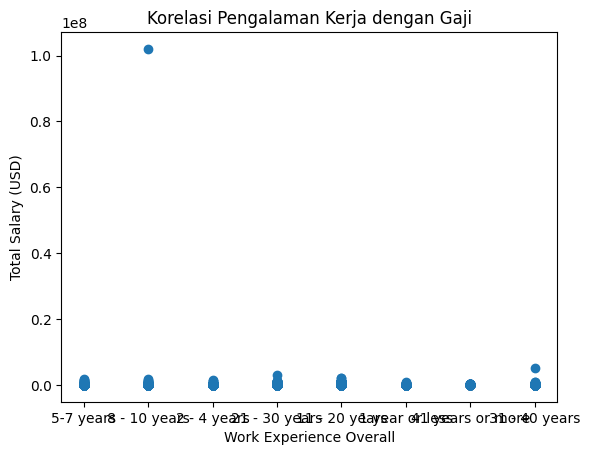

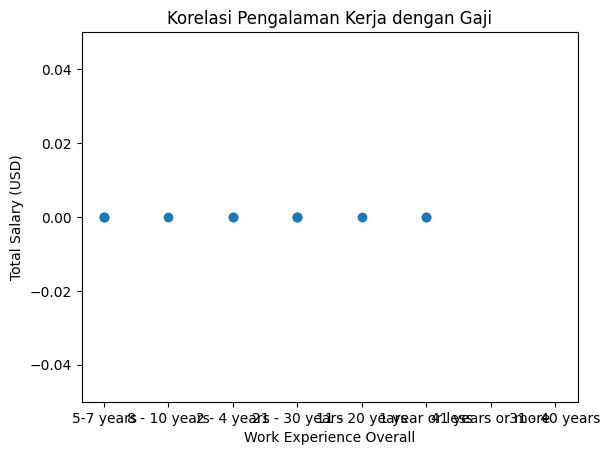

In [64]:
plt.pyplot.scatter(latihan_df['Work Experience Overall'], latihan_df['Total Salary (USD)'])
plt.pyplot.xlabel('Work Experience Overall')
plt.pyplot.ylabel('Total Salary (USD)')
plt.pyplot.title('Korelasi Pengalaman Kerja dengan Gaji')
plt.pyplot.show()

plt.pyplot.scatter(latihan_df['Work Experience Overall'], latihan_df['Total Salary (USD)'])
plt.pyplot.xlabel('Work Experience Overall')
plt.pyplot.ylabel('Total Salary (USD)')
plt.pyplot.title('Korelasi Pengalaman Kerja dengan Gaji')
plt.pyplot.ylim(bottom=-0.05, top=0.05)
plt.pyplot.show()

In [54]:
!pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


In [71]:
# Check for missing values in the "Gender" column
missing_indices = df.index[df['Gender'].isna()].tolist()

# Print the indices of missing values in the "Gender" column
if missing_indices:
    print("Missing values in the 'Gender' column at indices:", missing_indices)

Missing values in the 'Gender' column at indices: [171, 490, 537, 647, 658, 773, 1087, 1269, 1584, 1794, 1960, 2125, 2213, 2353, 2663, 3043, 3143, 3251, 3800, 4203, 4324, 4360, 4750, 5027, 5337, 5496, 5594, 5677, 5881, 6446, 6638, 6784, 6794, 7226, 7595, 7691, 7748, 8002, 8058, 8137, 8440, 8469, 8769, 9019, 9148, 9767, 9914, 9947, 10223, 10639, 10706, 10777, 11053, 11162, 11208, 11500, 11915, 12226, 12504, 12634, 12770, 13004, 13148, 13492, 13581, 13659, 13928, 14061, 14103, 14257, 14273, 14373, 14765, 14790, 15087, 15144, 15424, 15489, 15534, 15574, 15764, 16043, 16058, 16145, 16421, 16542, 16708, 17353, 17354, 17428, 17533, 17553, 17554, 17884, 17909, 17985, 18012, 18478, 18720, 18813, 18893, 18902, 18966, 19023, 19055, 19565, 19631, 19882, 20087, 20242, 20292, 20775, 21029, 21342, 21686, 21726, 21924, 21940, 22083, 22115, 22199, 22299, 22493, 22507, 22586, 22791, 22928, 23212, 23279, 23306, 23326, 23396, 23429, 23521, 23530, 23713, 23957, 24258, 24347, 24710, 24878, 24922, 25051, 25

In [68]:
latihan_df['Gender in Numeric'] = pd.factorize(latihan_df['Gender'])[0]

In [73]:
gender_salary_correlation = latihan_df['Gender in Numeric'].corr(latihan_df['Total Salary (USD)'], method='pearson')
print("Korelasi Jenis Kelamin dengan Gaji:", gender_salary_correlation)

Korelasi Jenis Kelamin dengan Gaji: 0.032752961935165276


In [77]:
latihan_df['Gender'] = latihan_df['Gender'].astype(str)

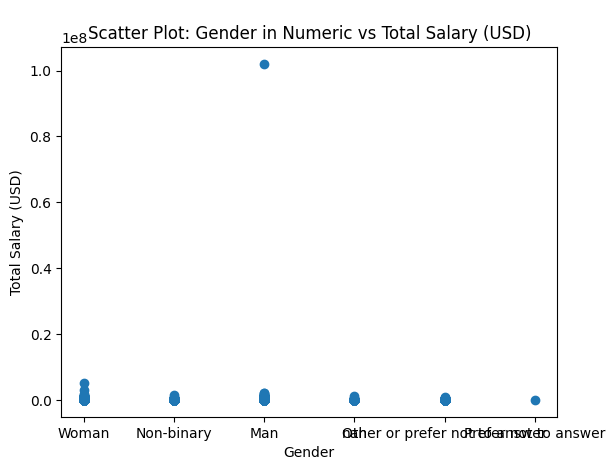

In [78]:
plt.scatter(latihan_df['Gender'], latihan_df['Total Salary (USD)'])
plt.xlabel('Gender')
plt.ylabel('Total Salary (USD)')
plt.title('Scatter Plot: Gender in Numeric vs Total Salary (USD)')
plt.show()

In [80]:
# Check for missing values in the "Gender" column
missing_indices = df.index[df['Education'].isna()].tolist()

# Print the indices of missing values in the "Gender" column
if missing_indices:
    print("Missing values in the 'Education' column at indices:", missing_indices)

Missing values in the 'Education' column at indices: [13, 24, 192, 241, 659, 736, 894, 1056, 1087, 1136, 1159, 1268, 1286, 1544, 1714, 1794, 1822, 2125, 2471, 2476, 2486, 2586, 2620, 2759, 2983, 3339, 3463, 3831, 3968, 4133, 4198, 4659, 5077, 5418, 5590, 5648, 5866, 5879, 6023, 6037, 6397, 6446, 6638, 6765, 6875, 6878, 6886, 7226, 7259, 7266, 7627, 7989, 8046, 8058, 8207, 8299, 8440, 8469, 8530, 8636, 8719, 8769, 8788, 9329, 9740, 9767, 9987, 11670, 11673, 11683, 11700, 11914, 11970, 12050, 12152, 12590, 12631, 12682, 12777, 12799, 12863, 13263, 13576, 13581, 13778, 14061, 14103, 14166, 14273, 14287, 14358, 14427, 14428, 14554, 14574, 14604, 14626, 14709, 14779, 14833, 14838, 14926, 15087, 15144, 15263, 15304, 15309, 15395, 15414, 15535, 15696, 15774, 15784, 15974, 16132, 16218, 16281, 16502, 16514, 16668, 16693, 16766, 17032, 17059, 17066, 17071, 17292, 17345, 17354, 17374, 17426, 17533, 17554, 17909, 17960, 17991, 18661, 18720, 18814, 18902, 19176, 19408, 19412, 19463, 19565, 19781, 

In [82]:
latihan_df['Education in Numeric'] = pd.factorize(latihan_df['Education'])[0]

In [84]:
education_salary_correlation = latihan_df['Education in Numeric'].corr(latihan_df['Total Salary (USD)'], method='pearson')
print("Korelasi Tingkat Pendidikan dengan Gaji:", education_salary_correlation)

Korelasi Tingkat Pendidikan dengan Gaji: 0.018811117978826855


In [87]:
latihan_df['Education'] = latihan_df['Education'].astype(str)

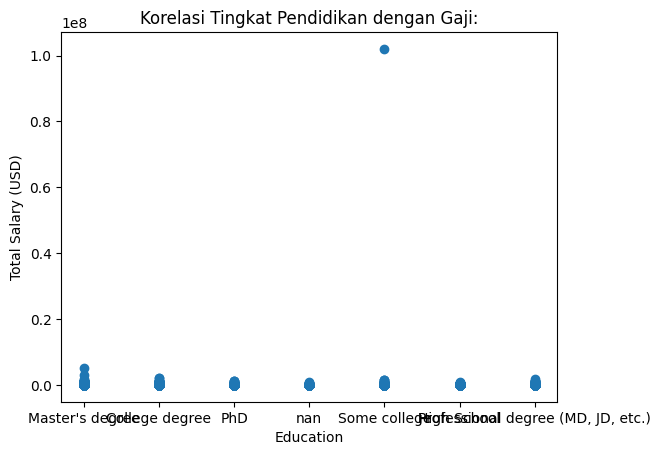

In [88]:
plt.scatter(latihan_df['Education'], latihan_df['Total Salary (USD)'])
plt.xlabel('Education')
plt.ylabel('Total Salary (USD)')
plt.title('Korelasi Tingkat Pendidikan dengan Gaji:')
plt.show()